<a href="https://colab.research.google.com/github/ashraful005/DS_ML_Bootcamp/blob/master/efficientnetb3_gan_progressed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%%capture
!pip install torchmetrics
!pip install torchinfo

In [3]:
# Data handling
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Preprocessing
import cv2
from sklearn.model_selection import train_test_split as tts

# Torch
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
from torchinfo import summary
from torchmetrics.classification import MulticlassAccuracy

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

# os
import os

# Path
from pathlib import Path

# tqdm
from tqdm.auto import tqdm

# typing
from typing import Dict, List

# Counter
from collections import Counter

# random
import random

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ashraful005","key":"4f746c27dab22414e17a0f5a0fe3baca"}'}

In [5]:
!pip install kaggle

In [6]:
!mkdir ~/.kaggle

In [7]:
!cp kaggle.json ~/.kaggle

In [8]:
!chmod 600 ~/.kaggle/kaggle.json

In [9]:
pip install --upgrade kaggle


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.6.5-py3-none-any.whl size=111932 sha256=d9929a2e3267072ddba9ac5addd5393b330659c67550b14099d22147803d5a85
  Stored in directory: /root/.cache/pip/wheels/09/0f/ab/77c3f5de4d162a047d4ac3e9a8ced7252d17ac1f9f2a42fa08
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.16
    Uninstalling kaggle-1.5.16:
      Successfully uninstalled kaggle-1.5.16


In [10]:
!kaggle datasets list

ref                                                        title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/apple-quality                             Apple Quality                                     170KB  2024-01-11 14:31:07          12541        292  1.0              
shiivvvaam/bitcoin-historical-data                         Bitcoin Historical Data                            95KB  2024-02-09 17:37:27            254         27  1.0              
nelgiriyewithana/emotions                                  Emotions                                           16MB  2024-02-05 16:01:39            898         54  1.0              
kanchana1990/2024-amazon-best-sellers-top-valentine-gifts  2024 Amazon Best Sellers: Top Valent

In [11]:
!kaggle datasets download 'subirbiswas19/freshwater-fish-disease-aquaculture-in-south-asia'

 85% 9.00M/10.6M [00:00<00:00, 76.3MB/s]
100% 10.6M/10.6M [00:00<00:00, 85.3MB/s]


In [12]:
!unzip freshwater-fish-disease-aquaculture-in-south-asia.zip

Archive:  freshwater-fish-disease-aquaculture-in-south-asia.zip
  inflating: SB-Fish-Disease.csv     
  inflating: SB-FishDisease/SB-FishDisease/Bacterial Red disease/Bacterial Red disease (1).jpeg  
  inflating: SB-FishDisease/SB-FishDisease/Bacterial Red disease/Bacterial Red disease (1).jpg  
  inflating: SB-FishDisease/SB-FishDisease/Bacterial Red disease/Bacterial Red disease (1).png  
  inflating: SB-FishDisease/SB-FishDisease/Bacterial Red disease/Bacterial Red disease (10).jpg  
  inflating: SB-FishDisease/SB-FishDisease/Bacterial Red disease/Bacterial Red disease (11).jpg  
  inflating: SB-FishDisease/SB-FishDisease/Bacterial Red disease/Bacterial Red disease (12).jpg  
  inflating: SB-FishDisease/SB-FishDisease/Bacterial Red disease/Bacterial Red disease (13).jpg  
  inflating: SB-FishDisease/SB-FishDisease/Bacterial Red disease/Bacterial Red disease (15).jpg  
  inflating: SB-FishDisease/SB-FishDisease/Bacterial Red disease/Bacterial Red disease (16).jpg  
  inflating: SB-Fi

In [13]:
import pandas as pd
import numpy as np
import os
import glob

import PIL
from PIL import Image
import imageio

import tensorflow as tf
import tensorflow_datasets as tfds

from sklearn.metrics import ConfusionMatrixDisplay

import matplotlib.pyplot as plt

import seaborn as sn
import numpy as np
import pathlib
import pandas as pd
import numpy as np
import os
import glob

import PIL
from PIL import Image
import imageio

import tensorflow as tf
import tensorflow_datasets as tfds

from sklearn.metrics import ConfusionMatrixDisplay

import matplotlib.pyplot as plt

import seaborn as sn
import numpy as np
import pathlib

#Deep learning libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Flatten , Activation , Dense , Dropout , BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam , Adamax
from tensorflow.keras import regularizers

**Load** **Dataset**

In [14]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator


#dataset_path = '/content/SB-FishDisease'

IMAGE_SIZE = 128
BATCH_SIZE = 32
EPOCHS=50

dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/SB-FishDisease/SB-FishDisease",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,

)





Found 457 files belonging to 7 classes.


In [15]:
resize_and_rescale= tf.keras.Sequential(
    [
        layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
        layers.experimental.preprocessing.Rescaling(1.0/255)
    ]
)

In [16]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [17]:
print(len(dataset))

15


In [18]:
classes=dataset.class_names
classes

['Bacterial Red disease',
 'Bacterial diseases - Aeromoniasis',
 'Bacterial gill disease',
 'Fungal diseases Saprolegniasis',
 'Healthy Fish',
 'Parasitic diseases',
 'Viral diseases White tail disease']

(32, 128, 128, 3)
[4 2 2 0 2 4 4 4 1 4 4 4 1 4 4 2 0 4 4 3 4 4 4 4 2 0 4 2 0 1 4 4]
(128, 128, 3)


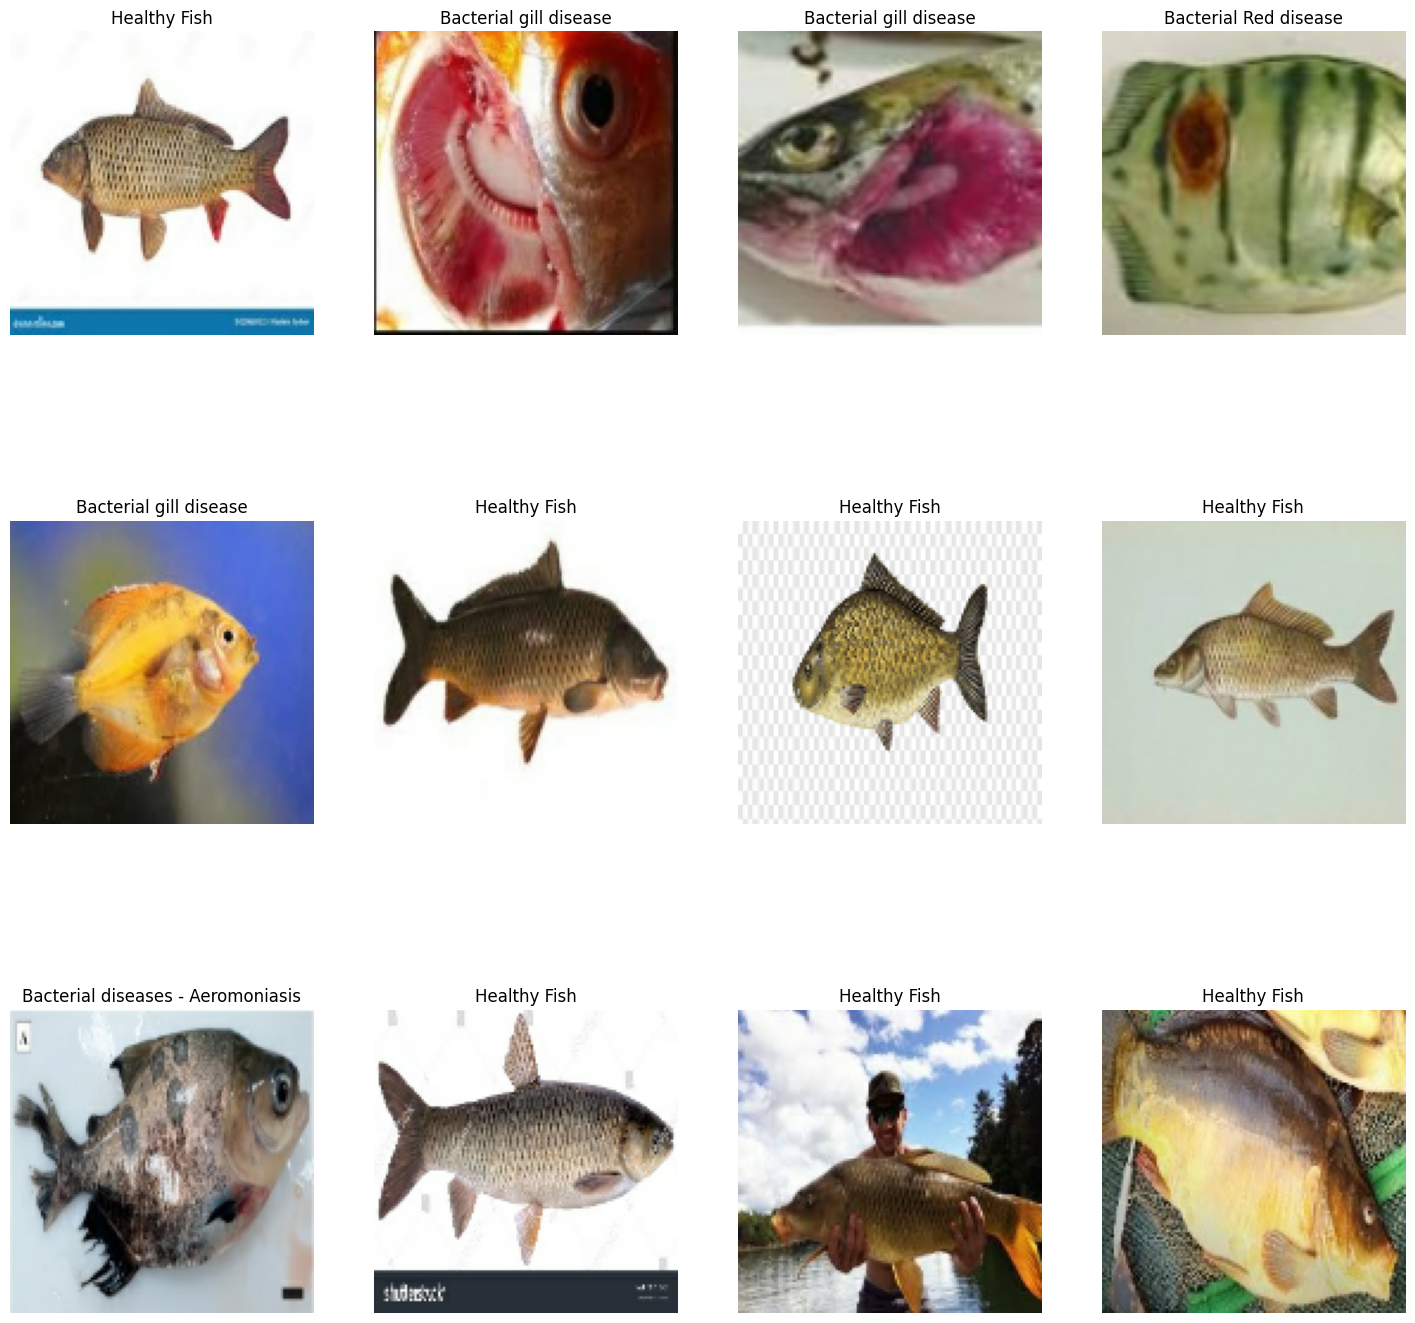

In [19]:
plt.figure(figsize=(18,18))
for image_batch, label_batch in dataset.take(1):
  print(image_batch.shape)
  print(label_batch.numpy())
  print(image_batch[0].shape)
  for i in range(12):
      ax = plt.subplot(3,4,i+1)
      plt.imshow(image_batch[i].numpy().astype("uint8"))
      plt.title(classes[label_batch[i]])
      plt.axis("off")

In [20]:
train_size=0.7
val_size=0.1
len(dataset)*train_size

10.5

**GAN Model**

In [21]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import time
import numpy as np
import cv2
from glob import glob
from matplotlib import pyplot
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras import layers as L
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


In [22]:
IMG_H = 128
IMG_W = 128
IMG_C = 3

In [23]:
def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

In [24]:
def load_image(image_path, label):
    img = tf.io.read_file(image_path)
    if tf.strings.regex_full_match(image_path, r".*\.png$"):
        img = tf.io.decode_png(img, channels=3)
    else:
        img = tf.io.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [IMG_H, IMG_W])
    img = tf.cast(img, tf.float32)
    img = (img - 127.5) / 127.5
    return img, label


In [25]:
def tf_dataset(images_path, images_label, batch_size):
    ds = tf.data.Dataset.from_tensor_slices((images_path, images_label))
    ds = ds.shuffle(buffer_size=1000).map(load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    ds = ds.batch(batch_size).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
    return ds

In [26]:
def build_generator(latent_dim, embed_dim, num_classes):
    noise = L.Input((latent_dim), name="noise_input")
    x = L.Dense(256)(noise)
    x = L.LeakyReLU(0.2)(x)

    label = L.Input((1), name="class_label")
    l = L.Embedding(num_classes, embed_dim)(label)
    l = L.Flatten()(l)

    x = L.Concatenate()([x, l])

    x = L.Dense(512)(x)
    x = L.LeakyReLU(0.2)(x)

    x = L.Dense(1024)(x)
    x = L.LeakyReLU(0.2)(x)

    x = L.Dense(4096)(x)
    x = L.LeakyReLU(0.2)(x)

    x = L.Dense(IMG_H * IMG_W * IMG_C)(x)
    x = L.LeakyReLU(0.2)(x)

    x = L.Reshape((IMG_H, IMG_W, IMG_C))(x)
    fake_output = L.Activation("tanh")(x)

    return Model([noise, label], fake_output, name="generator")

In [27]:
def build_discriminator(embed_dim, num_classes):
    image = L.Input((IMG_H, IMG_W, IMG_C), name="disc_input")
    x = L.Flatten()(image)
    x = L.Dense(4096)(x)
    x = L.LeakyReLU(0.2)(x)
    x = L.Dropout(0.3)(x)

    label = L.Input((1), name="class_label")
    l = L.Embedding(num_classes, embed_dim)(label)
    l = L.Flatten()(l)

    x = L.Concatenate()([x, l])

    x = L.Dense(1024)(x)
    x = L.LeakyReLU(0.2)(x)
    x = L.Dropout(0.3)(x)

    x = L.Dense(512)(x)
    x = L.LeakyReLU(0.2)(x)
    x = L.Dropout(0.3)(x)

    x = L.Dense(256)(x)
    x = L.LeakyReLU(0.2)(x)
    x = L.Dropout(0.3)(x)

    x = L.Dense(128)(x)
    x = L.LeakyReLU(0.2)(x)
    x = L.Dropout(0.3)(x)

    x = L.Dense(1)(x)

    return Model([image, label], x, name="discriminator")

In [28]:
@tf.function
def train_step(real_images, real_labels, latent_dim, num_classes, generator, discriminator, g_opt, d_opt):
    batch_size = tf.shape(real_images)[0]
    bce_loss = tf.keras.losses.BinaryCrossentropy(from_logits=True, label_smoothing=0.1)

    ## Discriminator
    noise = tf.random.normal([batch_size, latent_dim])

    for _ in range(3):
        with tf.GradientTape() as dtape:
            generated_images = generator([noise, real_labels], training=True)

            real_output = discriminator([real_images, real_labels], training=True)
            fake_output = discriminator([generated_images, real_labels], training=True)

            d_real_loss = bce_loss(tf.ones_like(real_output), real_output)
            d_fake_loss = bce_loss(tf.zeros_like(fake_output), fake_output)
            d_loss = d_real_loss + d_fake_loss

            d_grad = dtape.gradient(d_loss, discriminator.trainable_variables)
            d_opt.apply_gradients(zip(d_grad, discriminator.trainable_variables))

    with tf.GradientTape() as gtape:
        generated_images = generator([noise, real_labels], training=True)

        fake_output = discriminator([generated_images, real_labels], training=True)

        g_loss = bce_loss(tf.ones_like(fake_output), fake_output)

        g_grad = gtape.gradient(g_loss, generator.trainable_variables)
        g_opt.apply_gradients(zip(g_grad, generator.trainable_variables))

    return d_loss, g_loss

In [29]:
def save_plot(examples, epoch, n):
    n = int(n)
    examples = (examples + 1) / 2.0
    examples = examples * 255
    file_name = f"samples/generated_plot_epoch-{epoch+1}.png"

    cat_image = None
    for i in range(n):
        start_idx = i*n
        end_idx = (i+1)*n

        image_list = examples[start_idx:end_idx]
        if i == 0:
            cat_image = np.concatenate(image_list, axis=1)
        else:
            tmp = np.concatenate(image_list, axis=1)
            cat_image = np.concatenate([cat_image, tmp], axis=0)

    cv2.imwrite(file_name, cat_image)

In [32]:
!pip install tensorflow
!pip install tensorflow_io
from glob import glob
import tensorflow as tf
import tensorflow_io as tfio

if __name__ == "__main__":
    """ Hyperparameters """
    batch_size = 32
    latent_dim = 128
    embed_dim = 128
    num_classes = 7
    num_epochs = 100
    n_samples = 3*3
    path = "/content/SB-FishDisease/SB-FishDisease"

    images_path = glob(f"{path}/*/*.png") + glob(f"{path}/*/*.jpg") + glob(f"{path}/*/*.jpeg")
    labels_list = os.listdir(f"{path}")
    print(f"Number of labels: {len(labels_list)}")
    print(f"Labels: {labels_list}")
    images_label = []
    for path in images_path:
        name = path.split("/")[-2]
        index = labels_list.index(name)
        images_label.append(index)
    print(f"Images: {len(images_path)} - Labels: {len(images_label)}")
    create_dir("samples")
    create_dir("saved_model")
    g_model = build_generator(latent_dim, embed_dim, num_classes)
    d_model = build_discriminator(embed_dim, num_classes)

    g_model.summary()
    d_model.summary()

    #Training
    d_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)
    g_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)
    images_dataset = tf_dataset(images_path, images_label, batch_size)
    seed = np.random.normal(size=(n_samples, latent_dim))

    seed_class_label = [0, 1, 2]
    seed_label = []
    for item in seed_class_label:
        seed_label += [item] * int(np.sqrt(n_samples))

    seed_label = np.array(seed_label)

    for epoch in range(num_epochs):
        start = time.time()

        d_loss = 0.0
        g_loss = 0.0
        for image_batch, label_batch in images_dataset:
            d_batch_loss, g_batch_loss = train_step(image_batch, label_batch, latent_dim, num_classes, g_model, d_model, g_optimizer, d_optimizer)
            d_loss += d_batch_loss
            g_loss += g_batch_loss

        d_loss = d_loss/len(images_dataset)
        g_loss = g_loss/len(images_dataset)

        g_model.save("saved_model/g_model.h5")
        d_model.save("saved_model/d_model.h5")

        examples = g_model.predict([seed, seed_label], verbose=0)
        save_plot(examples, epoch, np.sqrt(n_samples))

        time_taken = time.time() - start
        print(f"[{epoch+1:1.0f}/{num_epochs}] {time_taken:2.2f}s - d_loss: {d_loss:1.4f} - g_loss: {g_loss:1.4f}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 MB 20.3 MB/s eta 0:00:00
Number of labels: 7
Labels: ['Bacterial Red disease', 'Bacterial diseases - Aeromoniasis', 'Bacterial gill disease', 'Fungal diseases Saprolegniasis', 'Healthy Fish', 'Viral diseases White tail disease', 'Parasitic diseases']
Images: 457 - Labels: 457
Model: "generator"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 noise_input (InputLayer)    [(None, 128)]                0         []                            
                                                                                                  
 class_label (InputLayer)    [(None, 1)]                  0         []                            
                                                                                                  
 dense (Dense)               (None, 256)              

[1/100] 206.82s - d_loss: 1.9602 - g_loss: 0.7921


[2/100] 199.29s - d_loss: 2.8556 - g_loss: 0.7315


[3/100] 197.08s - d_loss: 2.6788 - g_loss: 0.7442


[4/100] 198.29s - d_loss: 1.5613 - g_loss: 0.8733


[5/100] 204.80s - d_loss: 1.4754 - g_loss: 0.8977


[6/100] 191.40s - d_loss: 1.4696 - g_loss: 0.9341


[7/100] 199.10s - d_loss: 1.2402 - g_loss: 1.0049


[8/100] 200.48s - d_loss: 1.3359 - g_loss: 1.1034


[9/100] 198.31s - d_loss: 1.2658 - g_loss: 1.1655


[10/100] 203.06s - d_loss: 1.3875 - g_loss: 1.5695


[11/100] 203.81s - d_loss: 1.1578 - g_loss: 2.1936


[12/100] 195.54s - d_loss: 1.0175 - g_loss: 2.3720


[13/100] 195.22s - d_loss: 1.1119 - g_loss: 2.5846


[14/100] 194.65s - d_loss: 1.0524 - g_loss: 2.4783


[15/100] 202.57s - d_loss: 1.1746 - g_loss: 2.4288


[16/100] 201.85s - d_loss: 1.0208 - g_loss: 2.6935


[17/100] 199.21s - d_loss: 0.9512 - g_loss: 3.2305


[18/100] 200.39s - d_loss: 0.9397 - g_loss: 2.9448


[19/100] 194.51s - d_loss: 1.0845 - g_loss: 3.0012


[20/100] 209.97s - d_loss: 0.9997 - g_loss: 2.8987


[21/100] 217.66s - d_loss: 0.8224 - g_loss: 3.0858


[22/100] 205.90s - d_loss: 0.8967 - g_loss: 3.1104


[23/100] 198.77s - d_loss: 0.7300 - g_loss: 2.9426


[24/100] 212.23s - d_loss: 0.8883 - g_loss: 3.5308


[25/100] 194.66s - d_loss: 0.8648 - g_loss: 2.9397


[26/100] 196.58s - d_loss: 0.8044 - g_loss: 2.9700


[27/100] 214.75s - d_loss: 0.8813 - g_loss: 3.1840


[28/100] 208.09s - d_loss: 0.7382 - g_loss: 2.8596


[29/100] 217.24s - d_loss: 0.8157 - g_loss: 3.0546


[30/100] 195.51s - d_loss: 0.7649 - g_loss: 2.9544


[31/100] 197.71s - d_loss: 0.7401 - g_loss: 2.7116


[32/100] 211.38s - d_loss: 0.7513 - g_loss: 3.1010


[33/100] 205.90s - d_loss: 0.8235 - g_loss: 3.1988


[34/100] 204.06s - d_loss: 0.9185 - g_loss: 2.8804


[35/100] 204.03s - d_loss: 0.8831 - g_loss: 2.6980


[36/100] 198.27s - d_loss: 0.8663 - g_loss: 2.5280


[37/100] 197.68s - d_loss: 0.8854 - g_loss: 2.8892


[38/100] 203.71s - d_loss: 0.9705 - g_loss: 2.4776


[39/100] 211.43s - d_loss: 0.9392 - g_loss: 2.7705


[40/100] 199.77s - d_loss: 0.8451 - g_loss: 2.5498


[41/100] 207.00s - d_loss: 0.8306 - g_loss: 2.2671


[42/100] 195.12s - d_loss: 0.8873 - g_loss: 2.4819


[43/100] 204.58s - d_loss: 0.8130 - g_loss: 2.6831


[44/100] 207.08s - d_loss: 0.8163 - g_loss: 2.5545


[45/100] 214.24s - d_loss: 0.8539 - g_loss: 2.4959


[46/100] 200.65s - d_loss: 0.8023 - g_loss: 2.6665


[47/100] 217.85s - d_loss: 0.8188 - g_loss: 2.5501


[48/100] 196.70s - d_loss: 0.8145 - g_loss: 2.3596


[49/100] 196.02s - d_loss: 0.7512 - g_loss: 2.9131


[50/100] 204.66s - d_loss: 0.7879 - g_loss: 2.6082


[51/100] 203.91s - d_loss: 0.8643 - g_loss: 2.4956


[52/100] 200.13s - d_loss: 0.7559 - g_loss: 2.5274


[53/100] 209.22s - d_loss: 0.8144 - g_loss: 2.6393


[54/100] 204.05s - d_loss: 0.7586 - g_loss: 2.8171


[55/100] 208.89s - d_loss: 0.7775 - g_loss: 2.4870


[56/100] 207.13s - d_loss: 0.7803 - g_loss: 2.6809


[57/100] 213.00s - d_loss: 0.7951 - g_loss: 2.6547


[58/100] 206.26s - d_loss: 0.7720 - g_loss: 2.4662


[59/100] 206.94s - d_loss: 0.7053 - g_loss: 2.5675


[60/100] 198.10s - d_loss: 0.9368 - g_loss: 2.6611


[61/100] 206.64s - d_loss: 0.8824 - g_loss: 2.5113


[62/100] 220.64s - d_loss: 0.8094 - g_loss: 2.4747


[63/100] 205.37s - d_loss: 0.8693 - g_loss: 2.4163


[64/100] 213.05s - d_loss: 0.7772 - g_loss: 2.6579


[65/100] 219.88s - d_loss: 0.7309 - g_loss: 2.7305


[66/100] 218.85s - d_loss: 0.7456 - g_loss: 2.3735


[67/100] 216.98s - d_loss: 0.7606 - g_loss: 2.7395


[68/100] 229.42s - d_loss: 0.7837 - g_loss: 2.4501


[69/100] 210.53s - d_loss: 0.7950 - g_loss: 2.4063


[70/100] 196.52s - d_loss: 0.7628 - g_loss: 2.4966


[71/100] 225.75s - d_loss: 0.6938 - g_loss: 2.5402


[72/100] 211.28s - d_loss: 0.7112 - g_loss: 2.6205


[73/100] 212.97s - d_loss: 0.7343 - g_loss: 2.5207


[74/100] 228.48s - d_loss: 0.7457 - g_loss: 2.5039


[75/100] 212.08s - d_loss: 0.7144 - g_loss: 2.6692


[76/100] 227.84s - d_loss: 0.7720 - g_loss: 2.6895


[77/100] 217.34s - d_loss: 0.7132 - g_loss: 2.5166


[78/100] 213.47s - d_loss: 0.7066 - g_loss: 2.5681


[79/100] 210.72s - d_loss: 0.7113 - g_loss: 2.3098


[80/100] 210.91s - d_loss: 0.6848 - g_loss: 2.5655


[81/100] 214.75s - d_loss: 0.7448 - g_loss: 2.4648


[82/100] 223.71s - d_loss: 0.6585 - g_loss: 2.7063


[83/100] 223.29s - d_loss: 0.6888 - g_loss: 2.5222


[84/100] 210.95s - d_loss: 0.6598 - g_loss: 2.5500


[85/100] 219.11s - d_loss: 0.6496 - g_loss: 2.6272


[86/100] 216.37s - d_loss: 0.6409 - g_loss: 2.8290


[87/100] 208.48s - d_loss: 0.6408 - g_loss: 2.5562


[88/100] 226.26s - d_loss: 0.6418 - g_loss: 2.8379


[89/100] 210.81s - d_loss: 0.6396 - g_loss: 2.6251


[90/100] 220.65s - d_loss: 0.6179 - g_loss: 2.6987


[91/100] 218.45s - d_loss: 0.6796 - g_loss: 3.0087


[92/100] 216.90s - d_loss: 0.6413 - g_loss: 2.8039


[93/100] 224.63s - d_loss: 0.6344 - g_loss: 2.6783


[94/100] 206.77s - d_loss: 0.6123 - g_loss: 2.9541


[95/100] 215.58s - d_loss: 0.6101 - g_loss: 2.8747


[96/100] 226.99s - d_loss: 0.5967 - g_loss: 2.8713


[97/100] 211.47s - d_loss: 0.6803 - g_loss: 2.4656


[98/100] 218.81s - d_loss: 0.6433 - g_loss: 2.6083


[99/100] 221.82s - d_loss: 0.6348 - g_loss: 2.5920


[100/100] 214.08s - d_loss: 0.6080 - g_loss: 2.7982


In [ ]:
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from matplotlib import pyplot

def save_plot(examples, n):
    n = int(n)
    examples = (examples + 1) / 2.0
    examples = examples * 255
    file_name = f"fake_sample.png"

    cat_image = None
    for i in range(n):
        start_idx = i*n
        end_idx = (i+1)*n

        image_list = examples[start_idx:end_idx]
        if i == 0:
            cat_image = np.concatenate(image_list, axis=1)
        else:
            tmp = np.concatenate(image_list, axis=1)
            cat_image = np.concatenate([cat_image, tmp], axis=0)

    cv2.imwrite(file_name, cat_image)


if __name__ == "__main__":
    n_samples = 30*7
    latent_dim = 128
    embed_dim = 128
    num_classes = 7

    model = load_model("saved_model/g_model.h5")

    latent_points = np.random.normal(size=(n_samples, latent_dim))

    seed_class_label = [0, 1, 2, 3, 4, 5, 6]
    seed_label = []
    for item in seed_class_label:
        seed_label += [item] * int(np.sqrt(n_samples))

    seed_label = np.array(seed_label)

    examples = model.predict([latent_points, seed_label])
    save_plot(examples, np.sqrt(n_samples))

In [33]:
train_size=0.7
val_size=0.1
len(dataset)*train_size

10.5

In [34]:
train_ds=dataset.take(int(len(dataset)*train_size))
len(train_ds)

10

In [35]:
secondary_ds = dataset.skip(int(len(dataset)*train_size))
len(secondary_ds)

5

In [36]:
import math
val_ds=secondary_ds.take(math.ceil(len(secondary_ds)*val_size))
len(val_ds)

1

In [37]:
test_ds=secondary_ds.skip(math.ceil(len(secondary_ds)*val_size))
len(test_ds)

4

In [38]:
import tensorflow as tf
from tensorflow.keras import models, layers

CHANNELS = 3
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
num_classes = 7

base_model = tf.keras.applications.efficientnet.EfficientNetB3(include_top = False , weights = 'imagenet' ,input_shape = input_shape, pooling= 'max')
model = models.Sequential([base_model,
    BatchNormalization(axis= -1 , momentum= 0.99 , epsilon= 0.001),
    Dense(256, kernel_regularizer = regularizers.l2(l= 0.016) , activity_regularizer = regularizers.l1(0.006),bias_regularizer= regularizers.l1(0.006) , activation = 'relu'),
    Dropout(rate= 0.4 , seed = 75),
    Dense(128, kernel_regularizer = regularizers.l2(l= 0.016) , activity_regularizer = regularizers.l1(0.006),
    bias_regularizer= regularizers.l1(0.006) , activation = 'relu'),
    Dropout(rate= 0.2 , seed = 75),
    Dense(num_classes , activation = 'softmax')
])



model.build(input_shape=input_shape)

43941136/43941136 [==============================] - 0s 0us/step


In [39]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional  (None, 1536)              10783535  
 )                                                               
                                                                 
 batch_normalization (Batch  (None, 1536)              6144      
 Normalization)                                                  
                                                                 
 dense_11 (Dense)            (None, 256)               393472    
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               32896     
                                                                 
 dropout_6 (Dropout)         (None, 128)              

In [40]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
10/10 [==============================] - 45s 5s/step - loss: 0.5320 - accuracy: 0.9781 - val_loss: 0.3966 - val_accuracy: 1.0000
Epoch 2/50
10/10 [==============================] - 32s 3s/step - loss: 0.5253 - accuracy: 0.9750 - val_loss: 0.4586 - val_accuracy: 1.0000
Epoch 3/50
10/10 [==============================] - 33s 3s/step - loss: 0.4643 - accuracy: 0.9969 - val_loss: 0.4340 - val_accuracy: 1.0000
Epoch 4/50
10/10 [==============================] - 30s 3s/step - loss: 0.5011 - accuracy: 0.9781 - val_loss: 0.3858 - val_accuracy: 1.0000
Epoch 5/50
10/10 [==============================] - 31s 3s/step - loss: 0.4999 - accuracy: 0.9781 - val_loss: 0.5268 - val_accuracy: 1.0000
Epoch 6/50
10/10 [==============================] - 32s 3s/step - loss: 0.4932 - accuracy: 0.9688 - val_loss: 0.6317 - val_accuracy: 0.9375
Epoch 7/50
 8/10 [=======================>......] - ETA: 5s - loss: 0.4743 - accuracy: 0.9805

In [56]:
scores = model.evaluate(test_ds)

4/4 [==============================] - 3s 631ms/step - loss: 0.4712 - accuracy: 0.9905


In [43]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 10}

In [44]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [45]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

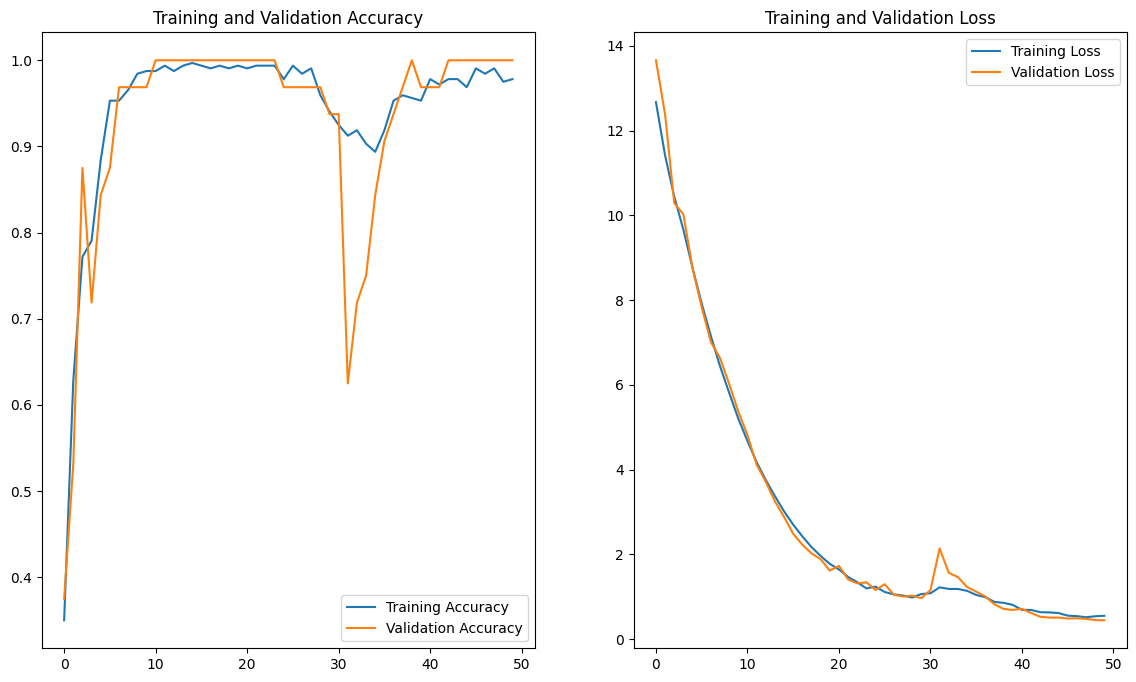

In [55]:
plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

First image to predict
Actual label:  Bacterial diseases - Aeromoniasis
1/1 [==============================] - 3s 3s/step
Predicted label: Bacterial diseases - Aeromoniasis


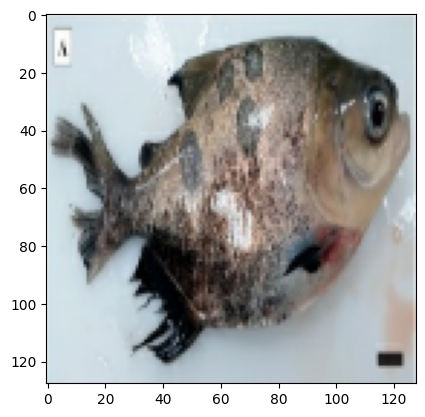

In [47]:
for image_batch, label_batch in test_ds.take(1):
  first_image = image_batch[0].numpy().astype('uint8')
  first_label = label_batch[0].numpy()

  print("First image to predict")
  plt.imshow(first_image)
  print("Actual label: ", classes[first_label])

  batch_predict = model.predict(image_batch)
  print("Predicted label:", classes[np.argmax(batch_predict[0])])

In [48]:
def predict(model, img):
  img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array = tf.expand_dims(img_array, 0)

  predictions = model.predict(img_array)

  predicted_class = classes[np.argmax(predictions[0])]
  probabilities = tf.nn.softmax(predictions)
  confidence = 100 * probabilities[0, np.argmax(predictions)]

  return predicted_class,confidence

1/1 [==============================] - 0s 48ms/step


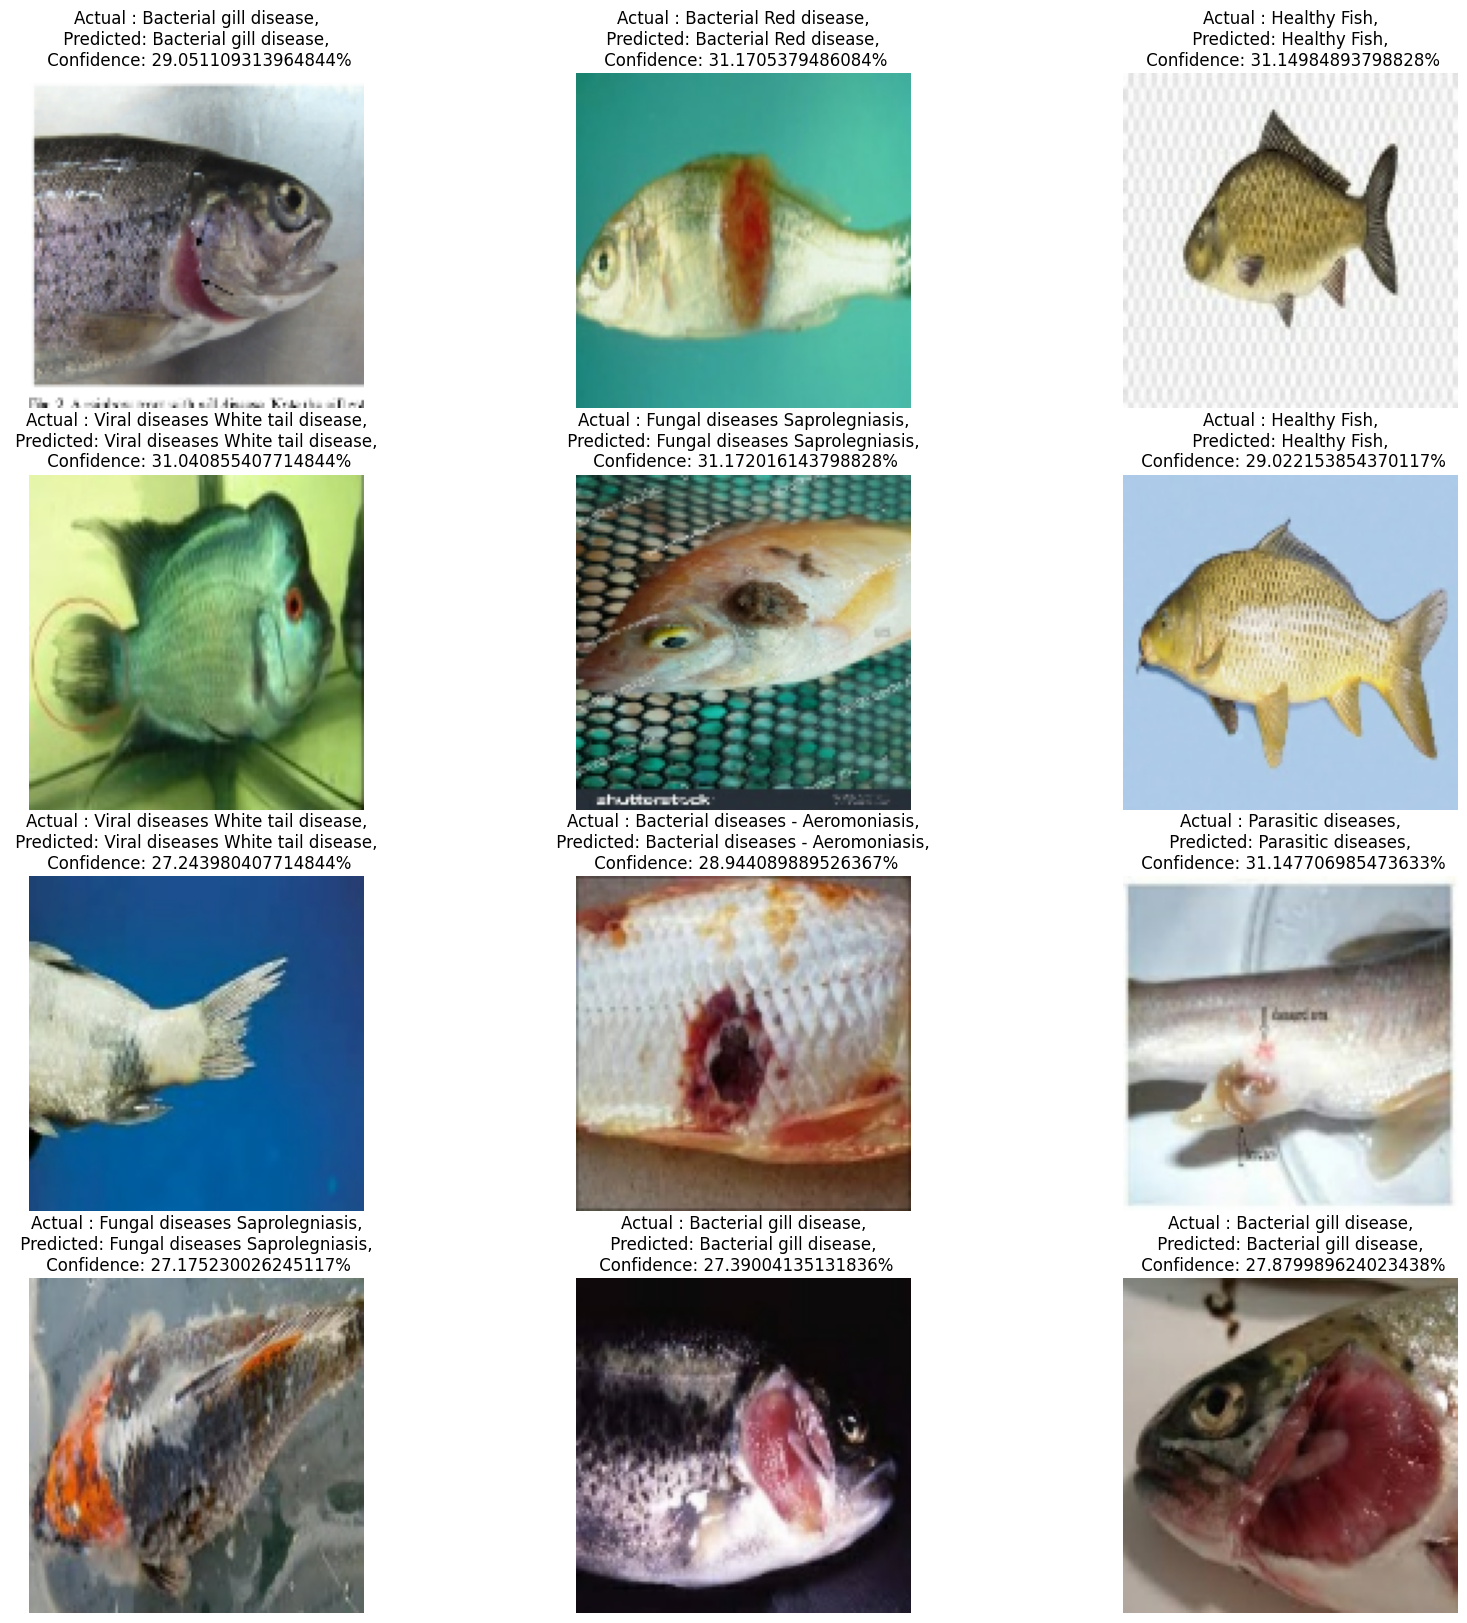

In [49]:
plt.figure(figsize=(20,20))

for images, labels in test_ds.take(1):
  for i in range(12):
    ax = plt.subplot(4,3, i+1)
    predicted_class, confidence = predict(model, images[i].numpy())
    actual_class = classes[labels[i]]

    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(f"Actual : {actual_class},\n Predicted: {predicted_class}, \n Confidence: {confidence}%")
    plt.axis("off")

In [50]:
model_version=1
model.save(f"../models/{model_version}")

In [51]:
classes

['Bacterial Red disease',
 'Bacterial diseases - Aeromoniasis',
 'Bacterial gill disease',
 'Fungal diseases Saprolegniasis',
 'Healthy Fish',
 'Parasitic diseases',
 'Viral diseases White tail disease']

In [52]:
def classification_report_gen(model, img):
  img_array = tf.keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0)
  predictions = model.predict(img_array)
  predicted_class = classes[np.argmax(predictions)]
  return predicted_class, predictions

1/1 [==============================] - 0s 50ms/step
                                   precision    recall  f1-score   support

            Bacterial Red disease       1.00      1.00      1.00        17
Bacterial diseases - Aeromoniasis       1.00      1.00      1.00        10
           Bacterial gill disease       1.00      1.00      1.00        13
   Fungal diseases Saprolegniasis       1.00      1.00      1.00        14
                     Healthy Fish       1.00      1.00      1.00        36
               Parasitic diseases       1.00      1.00      1.00         6
Viral diseases White tail disease       1.00      1.00      1.00         9

                         accuracy                           1.00       105
                        macro avg       1.00      1.00      1.00       105
                     weighted avg       1.00      1.00      1.00       105



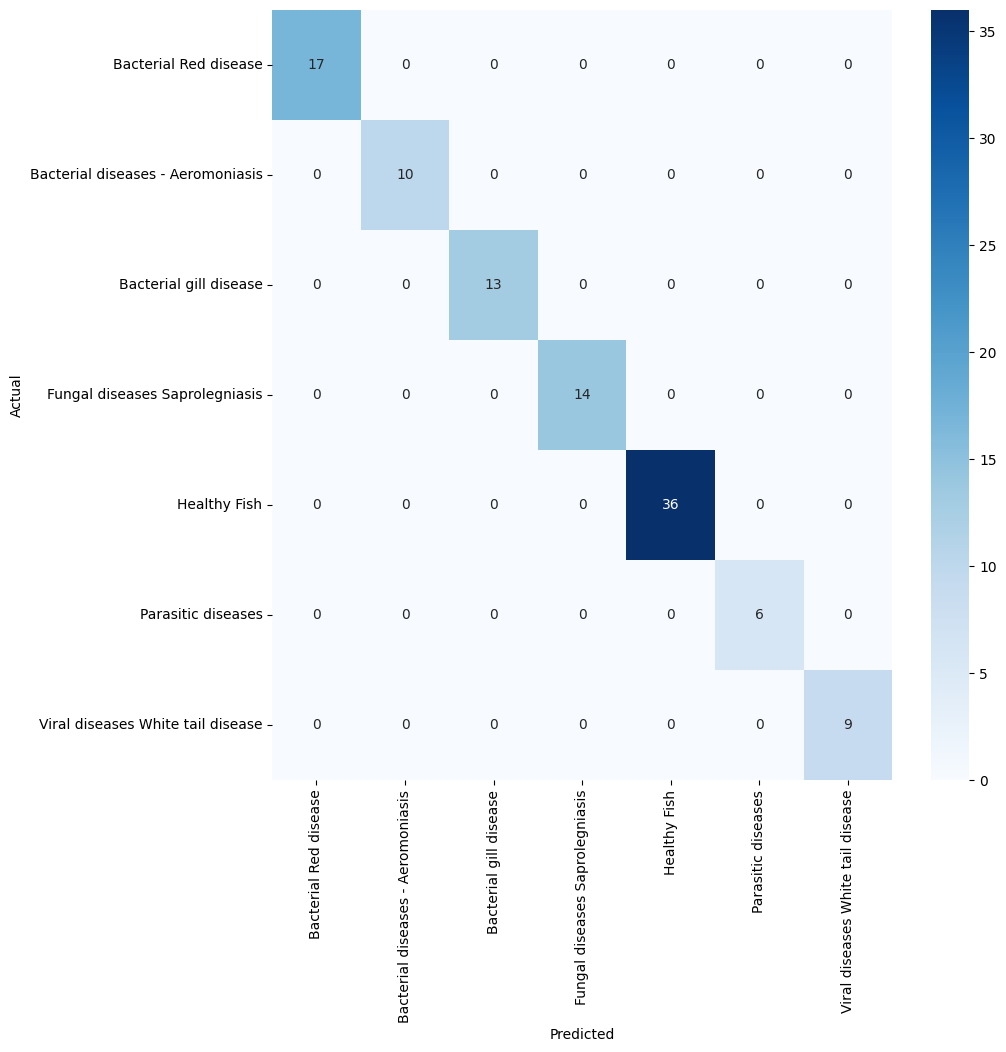

In [53]:
import matplotlib.pyplot as plt
import seaborn as sn

y_pred = []
y_true = []

for images, labels in test_ds:
  for image, label in zip(images, labels):
    image = image.numpy()
    predicted_class, _ = classification_report_gen(model, image)
    y_pred.append(predicted_class)
    y_true.append(classes[label])

print(classification_report(y_true, y_pred))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 10))
sn.heatmap(cm,cmap='Blues', annot=True, fmt="d", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [54]:
accuracy = np.trace(cm) / float(np.sum(cm))
print("Accuracy:", accuracy)

Accuracy: 1.0
